## 34207147 Jee Eun Kim

## 2. Perceptron vs Neural Networks

Question 2 [Neural Network’s Decision Boundary, 2+7+10+6=25 Marks]

### I. Load Task2B train.csv and Task2B test.csv datasets, plot the training and testing data separately in two plots. Mark the data with different labels in different colors.


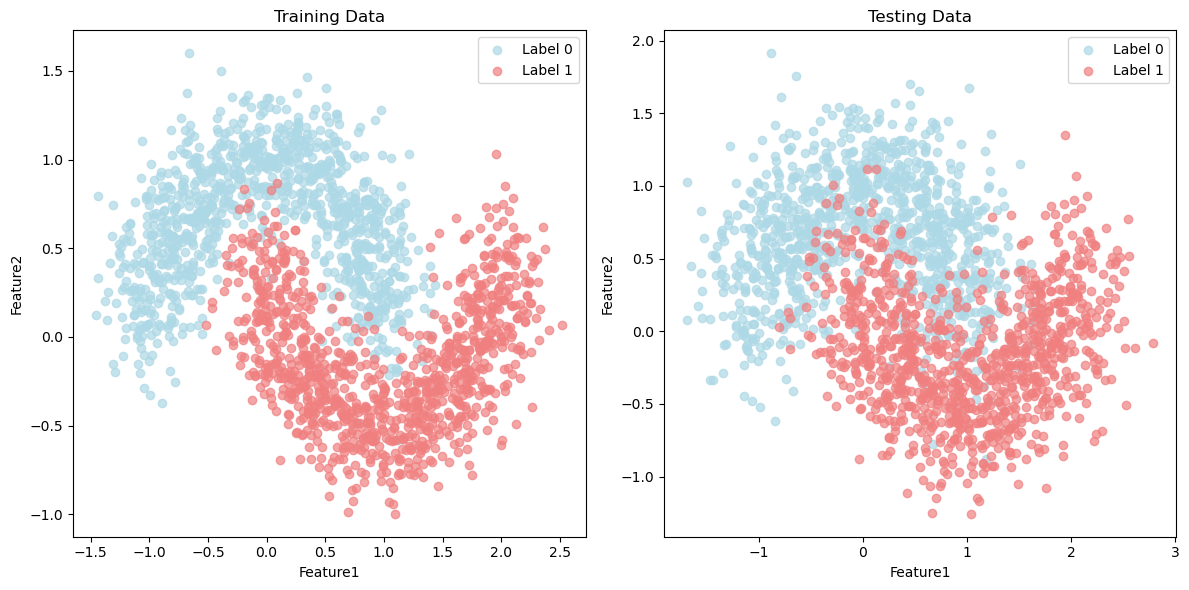

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
# file paths
file_path_train = '/Users/jeeeunkim/Desktop/[FIT5201]ML/ass2/Ass2 dataset/Task2B_train.csv'
file_path_test = '/Users/jeeeunkim/Desktop/[FIT5201]ML/ass2/Ass2 dataset/Task2B_test.csv'

# Load data
train_data = pd.read_csv(file_path_train)
test_data = pd.read_csv(file_path_test)

# Split features and labels
x_train, y_train = train_data[['feature1', 'feature2']].values, train_data['label'].values
x_test, y_test = test_data[['feature1', 'feature2']].values, test_data['label'].values

# Function for plotting data
def plot_data(data, title, subplot_pos):
    plt.subplot(1,2,subplot_pos)
    
    
    # label 0 = light blue, label 1 = light coral.
    plt.scatter(data[data['label'] == 0]['feature1'], data[data['label'] == 0]['feature2'],
                color='lightblue', label='Label 0', alpha=0.7)
    plt.scatter(data[data['label'] == 1]['feature1'], data[data['label'] == 1]['feature2'],
                color='lightcoral', label='Label 1', alpha=0.7)
    
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.legend()


# Plot Training Data and Testing Data
plt.figure(figsize=(12,6))

plot_data(train_data, 'Training Data',1)
plot_data(test_data, 'Testing Data',2)

plt.tight_layout()
plt.show()


### II. Train two Perceptron models on the loaded training data by setting the learning rates $\eta$ to 0.1 and 1.0 respectively. Calculate the test errors of two models and find the best $\eta$ and its corresponding model, then plot the decision boundary and the test data in one plot. Hint: We expect the decision boundary of your perceptron to be a linear function that separates the testing data into two parts. You may also choose to change the labels from [0, 1] to [-1, +1] for your convenience.

Learning rate (η): 0.1, Test Error: 0.2465
Learning rate (η): 1.0, Test Error: 0.1670

Best Learning Rate (η): 1.0, Test Error: 0.1670


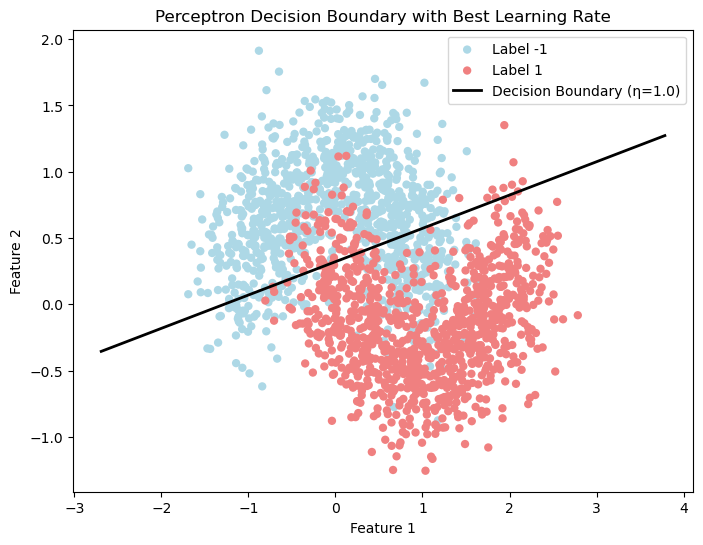

In [14]:
# Perceptron class
class Perceptron:
    def __init__(self, num_features=2, learning_rate=0.001, epochs=1000):
        # Initialize weights and bias randomly
        self.weights = np.random.rand(num_features)
        self.bias = np.random.rand(1)[0]  
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self, training_data, labels):
        # Train the model over multiple epochs
        for epoch in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                # Predict and update weights and bias based on error
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error

    def predict(self, inputs):
        # Calculate weighted sum and apply sign function
        logit = np.dot(self.weights.T, inputs) + self.bias
        return np.sign(logit)

# Convert labels to -1 and 1
y_train_mod = np.where(y_train == 0, -1, 1)
y_test_mod = np.where(y_test == 0, -1, 1)

# Train two Perceptron models with learning rates 0.1 and 1.0
learning_rates = [0.1, 1.0]
models = []
errors = []

for eta in learning_rates:
    model = Perceptron(learning_rate=eta, epochs=1000)
    model.fit(x_train, y_train_mod)  # Train model
    y_pred = np.array([model.predict(x) for x in x_test])  # Test predictions
    test_error = np.mean(y_pred != y_test_mod)  # Calculate test error
    models.append(model)
    errors.append(test_error)
    print(f"Learning rate (η): {eta}, Test Error: {test_error:.4f}")

# Choose the best learning rate
best_eta = learning_rates[np.argmin(errors)]
best_model = models[np.argmin(errors)]
print(f"\nBest Learning Rate (η): {best_eta}, Test Error: {min(errors):.4f}")

# Calculate decision boundary
slope = -best_model.weights[0] / best_model.weights[1]
intercept = -best_model.bias / best_model.weights[1]
x_vals = np.linspace(x_test[:, 0].min() - 1, x_test[:, 0].max() + 1, 100)
y_vals = slope * x_vals + intercept

# Plot test data and decision boundary
plt.figure(figsize=(8, 6))
colors = {1: 'lightcoral', -1: 'lightblue'}
for label in np.unique(y_test_mod):
    plt.scatter(x_test[y_test_mod == label][:, 0], x_test[y_test_mod == label][:, 1],
                color=colors[label], label=f'Label {label}', edgecolor='none')
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label=f"Decision Boundary (η={best_eta})")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary with Best Learning Rate")
plt.legend()
plt.show()


### III. For each combination of K (i.e, number of units in the hidden layer) in 5, 10, 15, ..., 40, (i.e. from 5 to 40 with a step size of 5), and eta (i.e., learning rate) in 0.01, 0.001 run the 3-layer Neural Network and record testing error for each of them. Plot the effect of different K values on the accuracy of the testing data. Based on this plot, find the best combination of K and eta and obtain your best model, then plot the decision boundary and the test data in one plot.

K = 5, η = 0.01, Test Error: 0.14800000000000002
K = 10, η = 0.01, Test Error: 0.16149999999999998
K = 15, η = 0.01, Test Error: 0.16049999999999998
K = 20, η = 0.01, Test Error: 0.14849999999999997
K = 25, η = 0.01, Test Error: 0.14049999999999996
K = 30, η = 0.01, Test Error: 0.15949999999999998
K = 35, η = 0.01, Test Error: 0.15849999999999997
K = 40, η = 0.01, Test Error: 0.16049999999999998
K = 5, η = 0.001, Test Error: 0.14349999999999996
K = 10, η = 0.001, Test Error: 0.14249999999999996
K = 15, η = 0.001, Test Error: 0.14249999999999996
K = 20, η = 0.001, Test Error: 0.14200000000000002
K = 25, η = 0.001, Test Error: 0.14049999999999996
K = 30, η = 0.001, Test Error: 0.14049999999999996
K = 35, η = 0.001, Test Error: 0.14049999999999996
K = 40, η = 0.001, Test Error: 0.14149999999999996


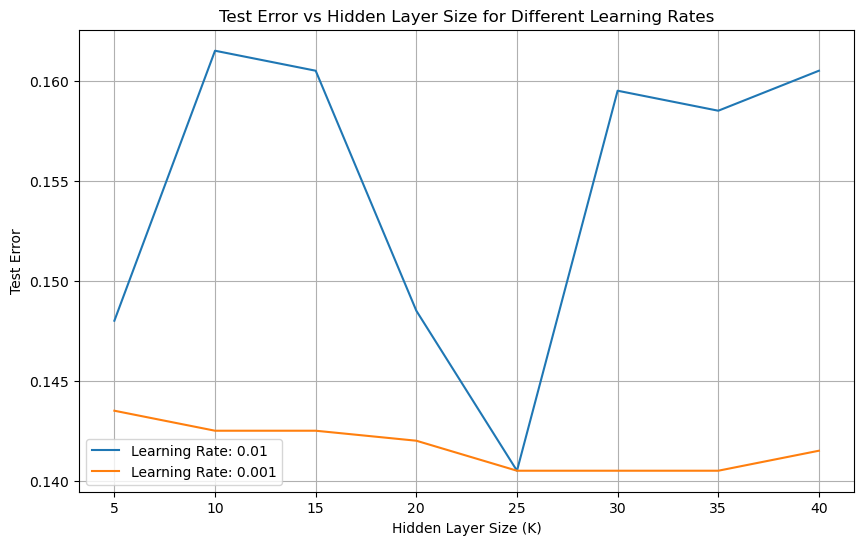

Best combination of K and η: K = 25, η = 0.01


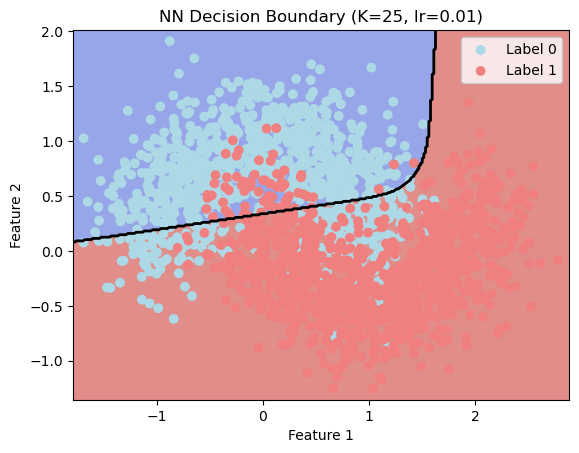

In [11]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, learning_rate, num_epochs):
        # Initialize NN parameters
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        
        # Initialize weights and biases
        self.w1 = np.random.rand(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.rand(hidden_size, 1) * 0.01
        self.b2 = np.zeros((1, 1))

    def sigmoid(self, x):
        # Sigmoid activation function
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # Derivative of sigmoid function
        return x * (1 - x)

    def calculate_loss(self, y_true, y_pred):
        # Cross Entropy 
        epsilon = 1e-9  # Small value to avoid log(0)
        return -np.mean(y_true * np.log(y_pred + epsilon) + (1 - y_true) * np.log(1 - y_pred + epsilon))

    def forward(self, X):
        # Forward pass
        z1 = np.dot(X, self.w1) + self.b1
        h1 = self.sigmoid(z1)
        z2 = np.dot(h1, self.w2) + self.b2
        h2 = self.sigmoid(z2)
        return h1, h2

    def backward(self, X, y, h1, h2):
        # Backward pass
        dL_dz2 = h2 - y
        dL_dz1 = dL_dz2.dot(self.w2.T) * self.sigmoid_derivative(h1)
        
        # Update weights and biases
        self.w2 -= h1.T.dot(dL_dz2) * self.learning_rate
        self.b2 -= np.sum(dL_dz2, axis=0, keepdims=True) * self.learning_rate
        self.w1 -= X.T.dot(dL_dz1) * self.learning_rate
        self.b1 -= np.sum(dL_dz1, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y):
        # Train the model
        y = y.reshape(-1, 1)
        for epoch in range(self.num_epochs):
            h1, h2 = self.forward(X)
            loss = self.calculate_loss(y, h2)
            self.backward(X, y, h1, h2)

    def predict(self, X):
        # Predict function
        _, h2 = self.forward(X)
        return (h2 > 0.5).astype(int)

# Set values for K and eta
K_values = list(range(5, 45, 5))
eta_values = [0.01, 0.001]
test_errors = []

# Train model for each combination of K and eta, calculate test errors
for eta in eta_values:
    errors_per_eta = []
    for K in K_values:
        model = NeuralNetwork(input_size=2, hidden_size=K, learning_rate=eta, num_epochs=1000)
        model.train(x_train, y_train)   
        y_pred = model.predict(x_test)  
        accuracy = accuracy_score(y_test, y_pred)
        test_error = 1 - accuracy
        errors_per_eta.append(test_error)
        print(f"K = {K}, η = {eta}, Test Error: {test_error}")
    test_errors.append(errors_per_eta)


# Plot test errors function
def plot_test_errors(K_values, test_errors, eta_values):
    plt.figure(figsize=(10, 6))
    for i, eta in enumerate(eta_values):
        plt.plot(K_values, test_errors[i], label=f"Learning Rate: {eta}")
    plt.xlabel("Hidden Layer Size (K)")
    plt.ylabel("Test Error")
    plt.title("Test Error vs Hidden Layer Size for Different Learning Rates")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_test_errors(K_values, test_errors, eta_values)

# Find optimal K and eta values
min_error_idx = np.argmin([min(errors) for errors in test_errors])
best_eta_idx = min_error_idx
best_K_idx = np.argmin(test_errors[best_eta_idx])
best_eta = eta_values[best_eta_idx]
best_K = K_values[best_K_idx]

print(f"Best combination of K and η: K = {best_K}, η = {best_eta}")

# Train model with best parameters
best_model = NeuralNetwork(input_size=2, hidden_size=best_K, learning_rate=best_eta, num_epochs=1000)
best_model.train(x_train, y_train)  # Train model without .values

# Plot decision boundary function
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)
    plt.contour(xx, yy, Z, levels=[0.5], colors='black', linewidths=2)
    
    colors = {1: 'lightcoral', 0: 'lightblue'}
    for label in np.unique(y):
        plt.scatter(X[y == label][:, 0], X[y == label][:, 1], color=colors[label], label=f'Label {label}', edgecolor='none', s=50)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(f'NN Decision Boundary (K={best_K}, lr={best_eta})')
    plt.legend()
    plt.show()

# Plot decision boundary
plot_decision_boundary(best_model, x_test, y_test) 

### IV. Explain the reason(s) responsible for such difference between Perceptron and a 3-layer Neural Network by comparing the plots you generated in Steps II and III. Hint: Look at the plots and think about the model assumptions.

**Perceptron's Linear Decision Boundary:** Since the Perceptron is a linear classifier, it divides the input feature space with a straight line. This means that the Perceptron is best suited for handling linearly separable data. In the this plot, we can see that the Perceptron's decision boundary is a straight line. However, because the data is not perfectly linearly separable, the boundary may not be an ideal fit.

**3-Layer Neural Network's Non-Linear Decision Boundary:** On the other hand, a 3-layer neural network uses non-linear activation functions (like ReLU or Sigmoid) to learn more complex decision boundaries. As shown in the this plot, the neural network creates a more precise, non-linear decision boundary that better separates the data. The network can capture the complex relationships between the two classes, even when the data is not linearly separable, resulting in better performance.